In [33]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

dat = pd.read_csv('lyrics.csv')
print(dat.shape)
dat = dat.dropna()
print(dat.shape)
dat = dat[dat['genre'] != 'Not Available']
print(dat.shape)
dat.head()

(362237, 6)
(266556, 6)
(242615, 6)


,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


In [35]:
for d in dat.values:
    l = len(d[5].split())
    if (l == 0):
        print(d[0], l)

In [64]:
#dat = dat[dat['genre'] != 'Rock']
#dat = dat[dat['genre'] != 'Pop']

#print(dat)
#dat.head()
print(dat.shape)
num_data = dat.shape[0]
#print(dat.ndim)
#print(dat.axes)
genre_count = Counter(dat['genre'])
print(genre_count.most_common())
genre_ratios = Counter({k: v / num_data for k, v in genre_count.items()})
genre_ratios.most_common()

(242615, 6)
[('Rock', 109235), ('Pop', 40466), ('Hip-Hop', 24850), ('Metal', 23759), ('Country', 14387), ('Jazz', 7970), ('Electronic', 7966), ('Other', 5189), ('R&B', 3401), ('Indie', 3149), ('Folk', 2243)]


[('Rock', 0.4502400923273499),
 ('Pop', 0.16679100632689653),
 ('Hip-Hop', 0.10242565381365538),
 ('Metal', 0.09792881726191703),
 ('Country', 0.05929971353790986),
 ('Jazz', 0.032850400840838366),
 ('Electronic', 0.032833913814067556),
 ('Other', 0.02138779547843291),
 ('R&B', 0.014018094511880963),
 ('Indie', 0.012979411825319951),
 ('Folk', 0.00924510026173155)]

In [76]:
cat_lens = {}
for cat in genre_count:
    #print(cat)
    cat_lens[cat] = []

for d in dat.values:
    cat = d[4]
    lyrics = d[5].split()
    cat_lens[cat].append(len(lyrics))
    
#s = sorted(cat_lens['Rock'])[:-1000]
cat_lens['Rock'] = s
#print(s)

#print(cat_lens)
cat_lens_mean = {k: np.mean(v) for k, v in cat_lens.items()}
cat_lens_var = {k: np.std(v) for k, v in cat_lens.items()}
print(cat_lens_mean)
print(cat_lens_var)

{'Pop': 245.74126427124006, 'Hip-Hop': 489.96205231388331, 'Rock': 186.04905991592369, 'Metal': 169.06877393829706, 'Other': 224.00982848333012, 'Country': 186.08639744213525, 'Jazz': 172.067252195734, 'Electronic': 193.37647501883004, 'Folk': 181.03700401248329, 'R&B': 224.93178476918553, 'Indie': 196.8542394410924}
{'Pop': 128.69672858055299, 'Hip-Hop': 238.62244874884394, 'Rock': 89.218155531813082, 'Metal': 112.80719433114726, 'Other': 139.40013026857338, 'Country': 82.996164708749973, 'Jazz': 97.424005678333344, 'Electronic': 138.8078804012533, 'Folk': 120.58979728933944, 'R&B': 120.03167789032793, 'Indie': 108.35780457635839}


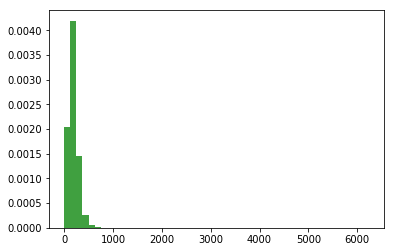

In [67]:
n, bins, patches = plt.hist(cat_lens['Rock'], 50, normed=1, facecolor='green', alpha=0.75)
plt.show()

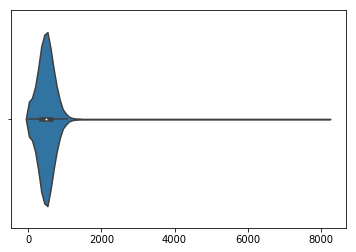

In [79]:
import seaborn as sns
%matplotlib inline
sns.violinplot(x=cat_lens['Hip-Hop'])

In [2]:
import gensim
w2v_model_path = './GoogleNews-vectors-negative300.bin'
model = gensim.models.KeyedVectors.load_word2vec_format(w2v_model_path, binary=True)

In [49]:
#model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
#vec = model.word_vec('woman') + model.word_vec('king') - model.word_vec('man')
#model.similar_by_vector(vec)
model.word_vec(['hello', 'world'])

TypeError: unhashable type: 'list'

In [52]:
avg_w2v_vecs = []
count = 0
for d in dat.values:
    if count % 50000 == 0: print(count)
    lyrics = d[5].split()
    vec = [model.word_vec(word) for word in lyrics if word in model.vocab]
    if len(vec) > 0: # FIXME should no vector = 0?
        vec = np.mean(vec, axis=0)
    else:
        vec = np.array([0]*300)
    avg_w2v_vecs.append(vec)
    count += 1
dat['test'] = avg_w2v_vecs
dat.head()

0
50000
100000
150000
200000


,index,song,year,artist,genre,lyrics,test
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...","[0.0891522, 0.0302434, 0.050566, 0.148018, -0...."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...","[0.0802692, 0.0134844, 0.0582191, 0.142561, -0..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,"[0.0588389, 0.0238774, 0.0641146, 0.12525, -0...."
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...","[0.0753044, 0.0115017, 0.0572545, 0.155749, -0..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...","[0.0592263, 0.0191876, 0.0648215, 0.118448, -0..."


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

classifier = Pipeline([
    ('clf', OneVsRestClassifier(LogisticRegression(class_weight='auto')))])
classifier.fit(training_x, training_y)
predictions = classifier.predict(test_x)